# ***Import Libraries***

In [464]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ***Loading the Dataset***

In [465]:
from google.colab import files
uploaded = files.upload()

df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn (10).csv


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# ***cleaning***

In [466]:
df.shape

(7043, 21)

In [467]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.00,7043.00,7043.00
mean,0.16,32.37,64.76
std,0.37,24.56,30.09
min,0.00,0.00,18.25
25%,0.00,9.00,35.50
50%,0.00,29.00,70.35
75%,0.00,55.00,89.85
max,1.00,72.00,118.75


In [468]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [469]:
df = df.drop(columns=['customerID'])

In [470]:
#Converted TotalCharges from object to numeric, replaced missing values with 0.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].isnull().sum()

np.int64(11)

In [471]:
df['TotalCharges'].fillna(0, inplace=True)
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [472]:
# Check duplicates
df.duplicated().sum()

np.int64(22)

In [473]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [474]:
#Converted binary features (Yes/No → 1/0)

binary_cols = ['Partner', 'Dependents', 'PhoneService',
               'PaperlessBilling', 'Churn']

for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

In [475]:
df['gender'] = df['gender'].str.strip().str.title()
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})

In [476]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


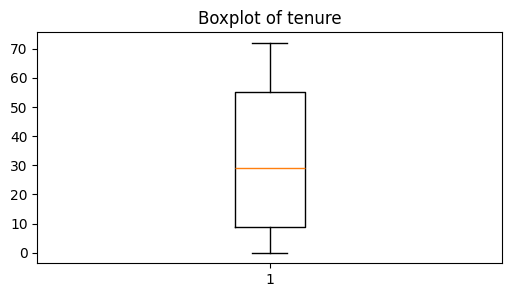

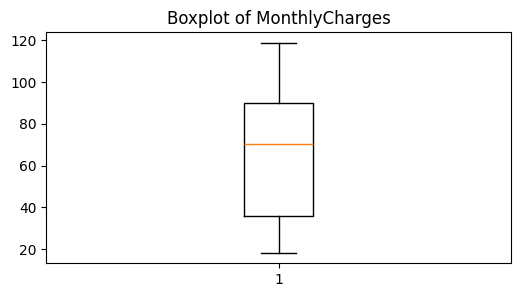

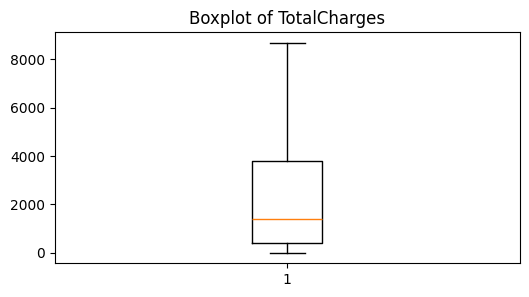

In [477]:
# chek outlier
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    plt.boxplot(df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# ***EDA***

***Churn***

Churn
0   73.55
1   26.45
Name: proportion, dtype: float64


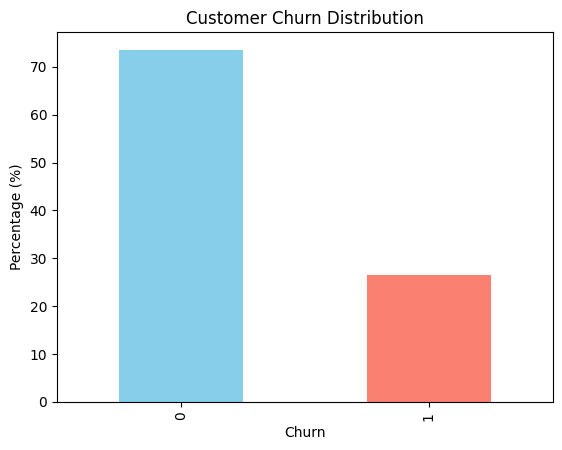

In [478]:
#What is the percentage of customers who churned vs. who stayed
churn_counts = df['Churn'].value_counts(normalize=True) * 100
print(churn_counts)

churn_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Customer Churn Distribution")
plt.ylabel("Percentage (%)")
plt.xlabel("Churn")
plt.show()

Average tenure by churn group:
 Churn
0   37.64
1   18.09
Name: tenure, dtype: float64


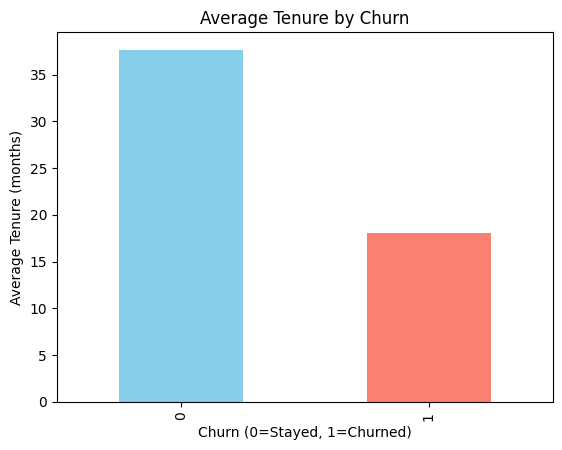

In [479]:
# Is there a relationship between the length of time the client stays  and churn?
avg_tenure = df.groupby('Churn')['tenure'].mean()
print("Average tenure by churn group:\n", avg_tenure)

avg_tenure.plot(kind='bar', color=['skyblue','salmon'])
plt.title("Average Tenure by Churn")
plt.xlabel("Churn (0=Stayed, 1=Churned)")
plt.ylabel("Average Tenure (months)")
plt.show()

***Accounts***

Churn Rate by Contract Type (%):
 Contract
Month-to-month   42.64
One year         11.27
Two year          2.83
Name: Churn, dtype: float64


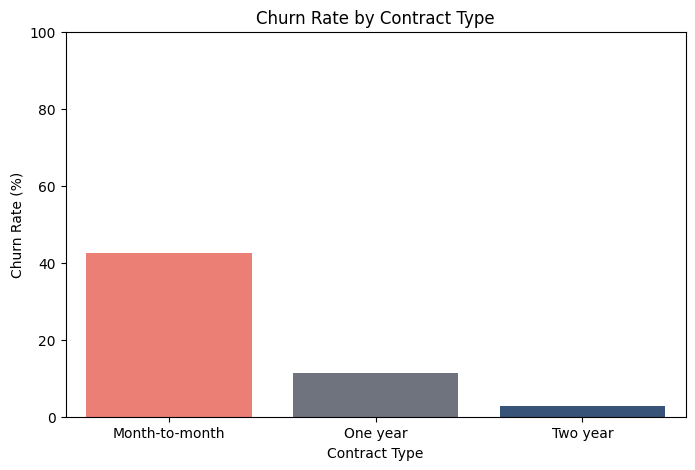

In [480]:
# Which type of contract has the most churn?
churn_by_contract = df.groupby('Contract')['Churn'].mean().sort_values(ascending=False) * 100

print("Churn Rate by Contract Type (%):\n", churn_by_contract)

plt.figure(figsize=(8, 5))
sns.barplot(x=churn_by_contract.index, y=churn_by_contract.values, palette=['#FF6F61', '#6B7280', '#2C5282'])
plt.title("Churn Rate by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Churn Rate (%)")
plt.ylim(0, 100)
plt.show()

Churn Rate by Payment Method (%):
 PaymentMethod
Electronic check            45.15
Mailed check                18.92
Bank transfer (automatic)   16.71
Credit card (automatic)     15.24
Name: Churn, dtype: float64


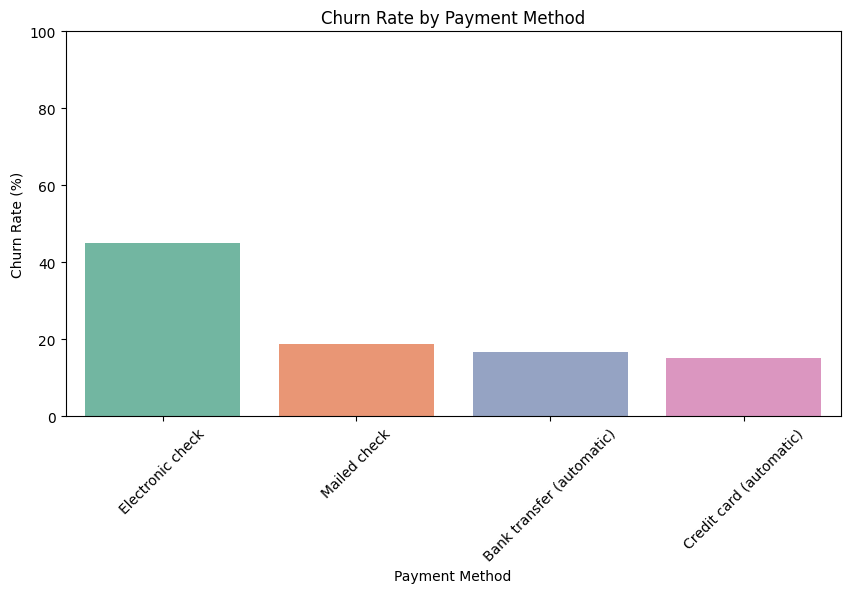

In [481]:
# What is the impact of the payment method on customer churn?
churn_by_payment = df.groupby('PaymentMethod')['Churn'].mean().sort_values(ascending=False) * 100
print("Churn Rate by Payment Method (%):\n", churn_by_payment)

plt.figure(figsize=(10, 5))
sns.barplot(x=churn_by_payment.index, y=churn_by_payment.values, palette='Set2')
plt.title("Churn Rate by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Churn Rate (%)")
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.show()

***Demographics***

Churn Rate by Gender (%):
 gender
1   26.84
0   26.07
Name: Churn, dtype: float64


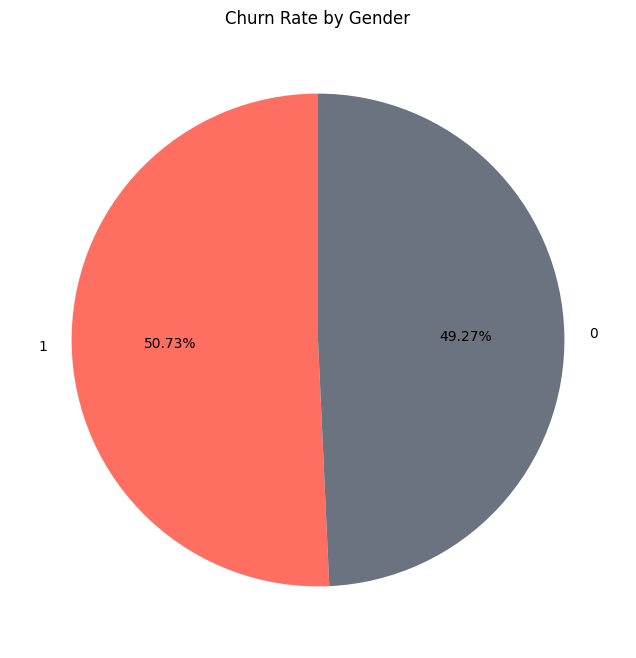

In [482]:
# Does gender have a clear impact on customer churn?
churn_by_gender = df.groupby('gender')['Churn'].mean().sort_values(ascending=False) * 100

print("Churn Rate by Gender (%):\n", churn_by_gender)

plt.figure(figsize=(8, 8))
plt.pie(churn_by_gender, labels=churn_by_gender.index, autopct='%1.2f%%', colors=['#FF6F61', '#6B7280'], startangle=90)
plt.title("Churn Rate by Gender")
plt.show()

Churn Rate by Senior Citizen Status (%):
 SeniorCitizen
1   41.63
0   23.50
Name: Churn, dtype: float64


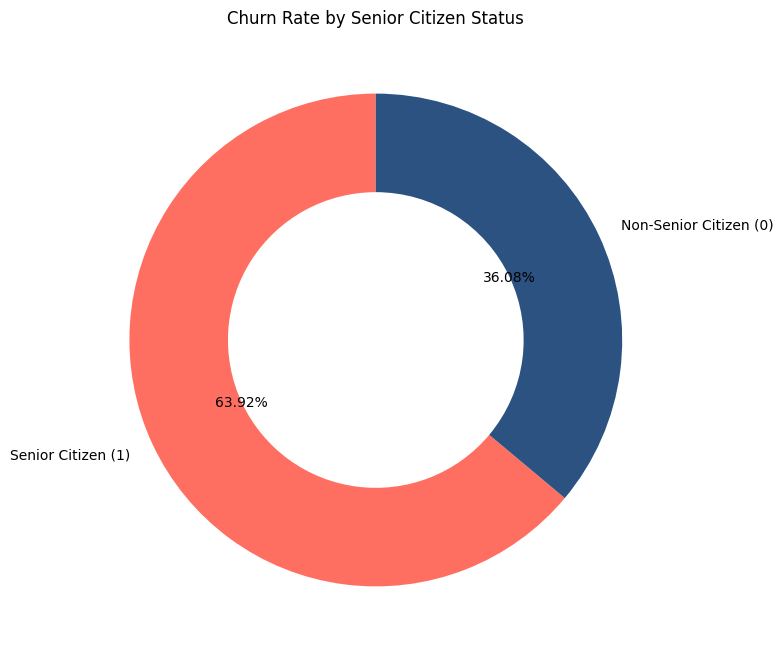

In [483]:
#Are senior citizen customers more likely to churn?
churn_by_senior = df.groupby('SeniorCitizen')['Churn'].mean().sort_values(ascending=False) * 100

print("Churn Rate by Senior Citizen Status (%):\n", churn_by_senior)

plt.figure(figsize=(8, 8))
plt.pie(churn_by_senior, labels=['Senior Citizen (1)', 'Non-Senior Citizen (0)'], autopct='%1.2f%%', colors=['#FF6F61', '#2C5282'], startangle=90, wedgeprops=dict(width=0.4))
plt.title("Churn Rate by Senior Citizen Status")
plt.show()

**Services**

Churn Rate by OnlineSecurity and TechSupport (%):
 TechSupport            No  No internet service   Yes
OnlineSecurity                                      
No                  48.80                  NaN 22.33
No internet service   NaN                 7.21   NaN
Yes                 21.30                  NaN  9.01


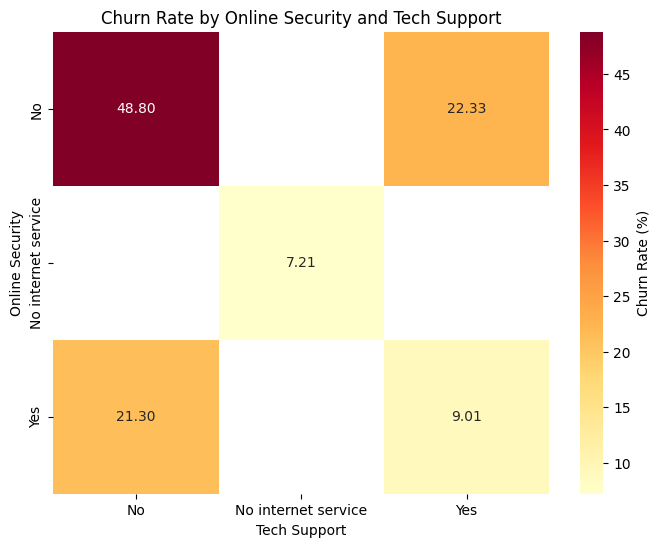

In [484]:
#"Are customers without Online Security or Tech Support more likely to churn?"
churn_by_security_support = df.groupby(['OnlineSecurity', 'TechSupport'])['Churn'].mean().unstack() * 100

print("Churn Rate by OnlineSecurity and TechSupport (%):\n", churn_by_security_support)

plt.figure(figsize=(8, 6))
sns.heatmap(churn_by_security_support, annot=True, fmt=".2f", cmap="YlOrRd", cbar_kws={'label': 'Churn Rate (%)'})
plt.title("Churn Rate by Online Security and Tech Support")
plt.xlabel("Tech Support")
plt.ylabel("Online Security")
plt.show()

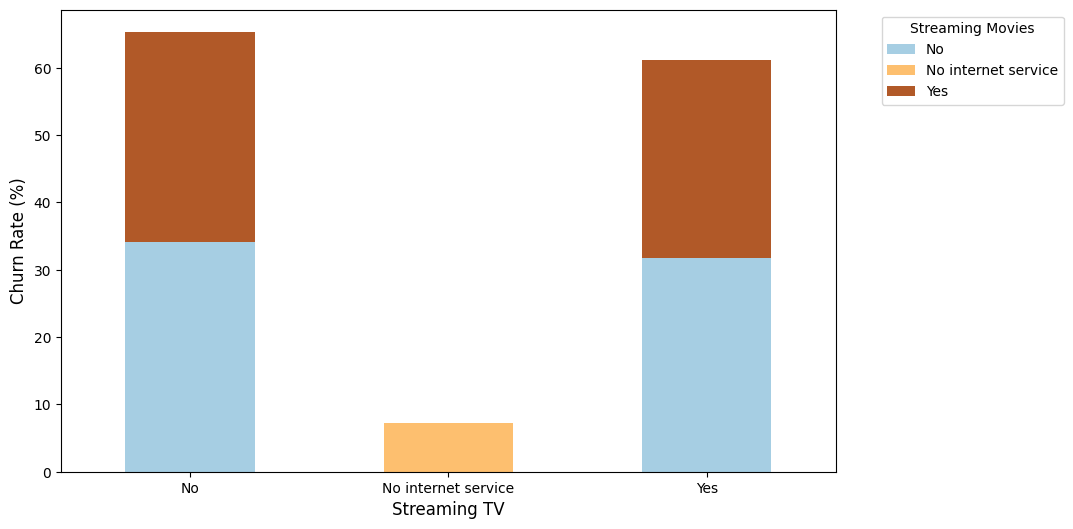

In [485]:
# Are customers who have StreamingTV or StreamingMovies leaving more or less?
churn_by_streaming = df.groupby(['StreamingTV', 'StreamingMovies'])['Churn'].mean().unstack() * 100

churn_by_streaming.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    colormap='Paired'
)
plt.xlabel("Streaming TV", fontsize=12)
plt.ylabel("Churn Rate (%)", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Streaming Movies", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


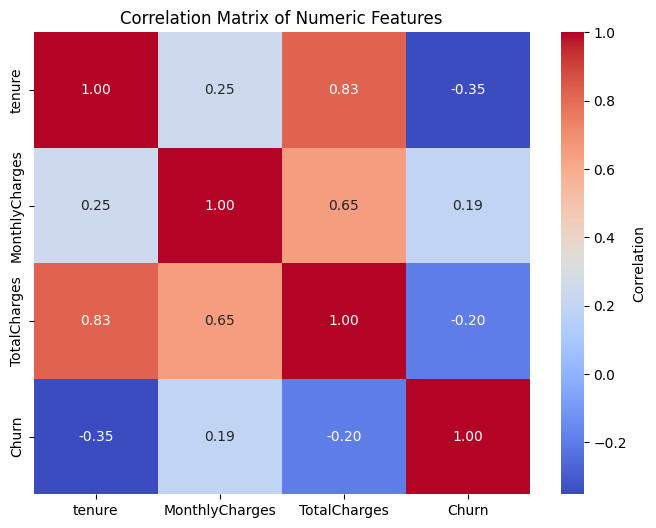

In [486]:

numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']
corr_matrix = df[numeric_cols].corr()

# Visualization (Heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Correlation'})
plt.title("Correlation Matrix of Numeric Features")
plt.show()

In [487]:
low_info_features = [ 'PhoneService', 'MultipleLines']
df.drop(low_info_features, axis=1, inplace=True)

In [488]:
#df['AvgMonthlyCharge'] = df['TotalCharges'] / (df['tenure'] + 1)  # +1 to avoid division by zero

# ***Split Data into X,Y***

In [489]:
from sklearn.model_selection import train_test_split
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [490]:
#Apply One-Hot-Encoding to Categorical Features
from sklearn.preprocessing import OneHotEncoder

categorical_cols = [
     'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaymentMethod']

ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

X_train_encoded = pd.DataFrame(
    ohe.fit_transform(X_train[categorical_cols]),
    columns=ohe.get_feature_names_out(categorical_cols),
    index=X_train.index
)
X_test_encoded = pd.DataFrame(
    ohe.transform(X_test[categorical_cols]),
    columns=ohe.get_feature_names_out(categorical_cols),
    index=X_test.index
)

X_train_final = pd.concat([X_train.drop(columns=categorical_cols), X_train_encoded], axis=1)
X_test_final = pd.concat([X_test.drop(columns=categorical_cols), X_test_encoded], axis=1)

# ***# Standardize the features by StandardScaler***

In [491]:
from sklearn.preprocessing import StandardScaler
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()

X_train_final[numeric_cols] = scaler.fit_transform(X_train_final[numeric_cols])
X_test_final[numeric_cols] = scaler.transform(X_test_final[numeric_cols])

# ***Improve imbalance using SMOTE***

In [492]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

X_train_bal, y_train_bal = smote.fit_resample(X_train_final, y_train)

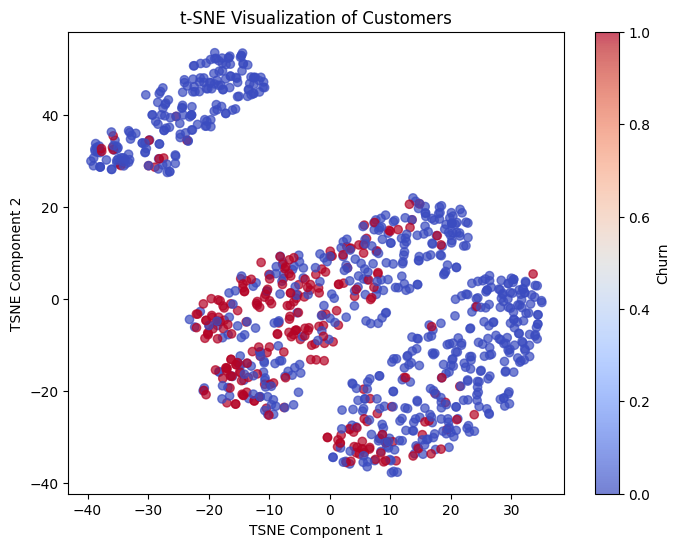

In [493]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

X_sample = X_train_final.sample(1000, random_state=42)
y_sample = y_train.loc[X_sample.index]

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_sample)

plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y_sample, cmap='coolwarm', alpha=0.7)
plt.colorbar(label='Churn')
plt.title("t-SNE Visualization of Customers")
plt.xlabel("TSNE Component 1")
plt.ylabel("TSNE Component 2")
plt.show()


# ***Modeling***

In [494]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report


In [495]:
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    class_weight='balanced'
    )
rf.fit(X_train_final, y_train)


y_pred = rf.predict(X_test_final)
y_probs = rf.predict_proba(X_test_final)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7800711743772242
F1 Score: 0.5282442748091603

Confusion Matrix:
 [[923 110]
 [199 173]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.86      1033
           1       0.61      0.47      0.53       372

    accuracy                           0.78      1405
   macro avg       0.72      0.68      0.69      1405
weighted avg       0.77      0.78      0.77      1405



In [496]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

xgb = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
)

xgb.fit(X_train_final, y_train)

y_pred = xgb.predict(X_test_final)
y_probs = xgb.predict_proba(X_test_final)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.79644128113879
F1 Score: 0.5692771084337349

Confusion Matrix:
 [[930 103]
 [183 189]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1033
           1       0.65      0.51      0.57       372

    accuracy                           0.80      1405
   macro avg       0.74      0.70      0.72      1405
weighted avg       0.79      0.80      0.79      1405



In [497]:
#LogisticRegression
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

pca = PCA(n_components=0.95, random_state=42)

X_train_pca = pca.fit_transform(X_train_final)
X_test_pca = pca.transform(X_test_final)

print("Original features:", X_train_final.shape[1])
print("PCA components:", X_train_pca.shape[1])

# Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_pca, y_train)

y_pred = lr.predict(X_test_pca)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Original features: 36
PCA components: 16
Accuracy: 0.798576512455516
F1 Score: 0.5679389312977099

Confusion Matrix:
 [[936  97]
 [186 186]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1033
           1       0.66      0.50      0.57       372

    accuracy                           0.80      1405
   macro avg       0.75      0.70      0.72      1405
weighted avg       0.79      0.80      0.79      1405

